# Praktikum 06 - Dimensionality Reduction - LEER

In [1]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb # data visualization library  
import matplotlib.pyplot as plt

## Daten importieren

Die Daten können mit Pandas eingelesen werden mit dem Befehl `pd.read_csv()`.
In vielen Fällen funktioniert dies nicht direkt. Meistens liegt es dann an einem der folgenden Punkte:
- `FileNotFoundError` --> Entweder der Dateiname ist falsch geschrieben, oder der Pfad stimmt nicht.
- `UnicodeDecodeError` --> Entweder der Dateiname (+Pfad) wurden mit unerlaubten Zeichen geschrieben (bei Windows z.B. muss oft "//" statt "/" verwendet werden), oder die Datei selbst ist nicht im erwarteten "Encoding" gespeichert. Für letzterers gibt es zwei Möglichkeiten: (1) Die Datei mit einem Editor umwandeln. Oder (2) den parameter `encoding=...` entsprechend setzten.  
Es gibt sehr viele mögliche Encodings ([siehe Link](https://docs.python.org/3/library/codecs.html#standard-encodings)), aber am häufigsten sind "utf-8" (der Standard), "ANSI" (auf mac: "iso-8859-1" oder "ISO8859") oder "ASCII".
- `ParserError` --> Bedeutet meistens, dass der "delimiter" also das Trennzeichen falsch angegeben ist. Am besten die Datei kurz mit einem Editor öffnen und nachschauen und dann entsprechend setzten mit `delimiter="..."`. Typische Trennzeichen sind `","`, `";"`, `"\t"` (tab).
- Falls die Datei nicht mit den gewünschten Spaltennamen beginnt, kann dies durch das Angeben der zu überspringenden Zeilen korrigiert werden --> `skiprows=1` (1, 2, 3,... je nach Fall).

In [3]:
filename = "breast_cancer_wisconsin_data.csv"
path_data = "../../datasets"

data = pd.read_csv(os.path.join(path_data, filename), index_col=0)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504                0.2430          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   

          fractal_dimension_worst  Unnamed: 32  
id                                              
842302                    0.11890          NaN  
842517                    0.08902          NaN  
84300903                  0.08758          NaN  
84348301                  0.17300          NaN  
84358402                  0.07678          NaN  

[5 rows x 32 columns]

# (1) Erste Datenerkundung
Das sollte langsam bekannt sein... :)

- Gibt es fehlende Werte? --> `.info()`
- erster Überblick & Suche nach problematischen Einträgen --> `.describe()`

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [5]:
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  texture_worst  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       fractal_dimension_worst  Unnamed: 32  
count               569.000000          0.0  
mean                  0.083946          NaN  
std                   0.018061          NaN  
min                   0.055040          NaN  
25%                   0.071460          NaN  
50%                   0.080040          NaN  
75%                   0.092080          NaN  
max                   0.207500          NaN  

[8 rows x 31 columns]

# (2) Data cleaning
- Einträge mit NaNs entfernen
- In diesem Fall gibt es mindestens eine Spalte, die wir sicher entfernen können...

Entfernen von Spalten geht z.B. mit
```python
to_drop = ["spalte_abc", "spalte_xyz"]
data = data.drop(to_drop, axis=1)
```

In [13]:
data = data.drop(["Unnamed: 32"], axis=1)

# (3) Daten erkunden
Wir hatten bisher verschiedene Möglichkeiten ausprobiert um Daten zu erkungen. 

- mit `data.hist()` alle Verteilungen darstellen
- mit `sb.pairplot()` die Verteilungen und jeweiligen paarweisen Abhängigkeiten darstellen
- mit `data.corr()` bzw. `sb.heatmap(data.corr())` die Korrelationen anzuzeigen.

Darüber hinaus haben wir noch die üblichen Pandas-Methoden um uns die Daten näher anzuschauen, z.B. über `.plot()`, über `.value_counts()` (bei kategorialen Daten), oder über Masken wenn es um kompliziertere Fragen geht.

### Aufgaben:
1) Pair-plot --> Code ist bereitgestellt, einfach ausführen und diskutieren.  
-  Wie stehen unsere Chancen um anhand der Daten Malignent ("bösartig") von Benign ("gutartig") zu unterscheiden?

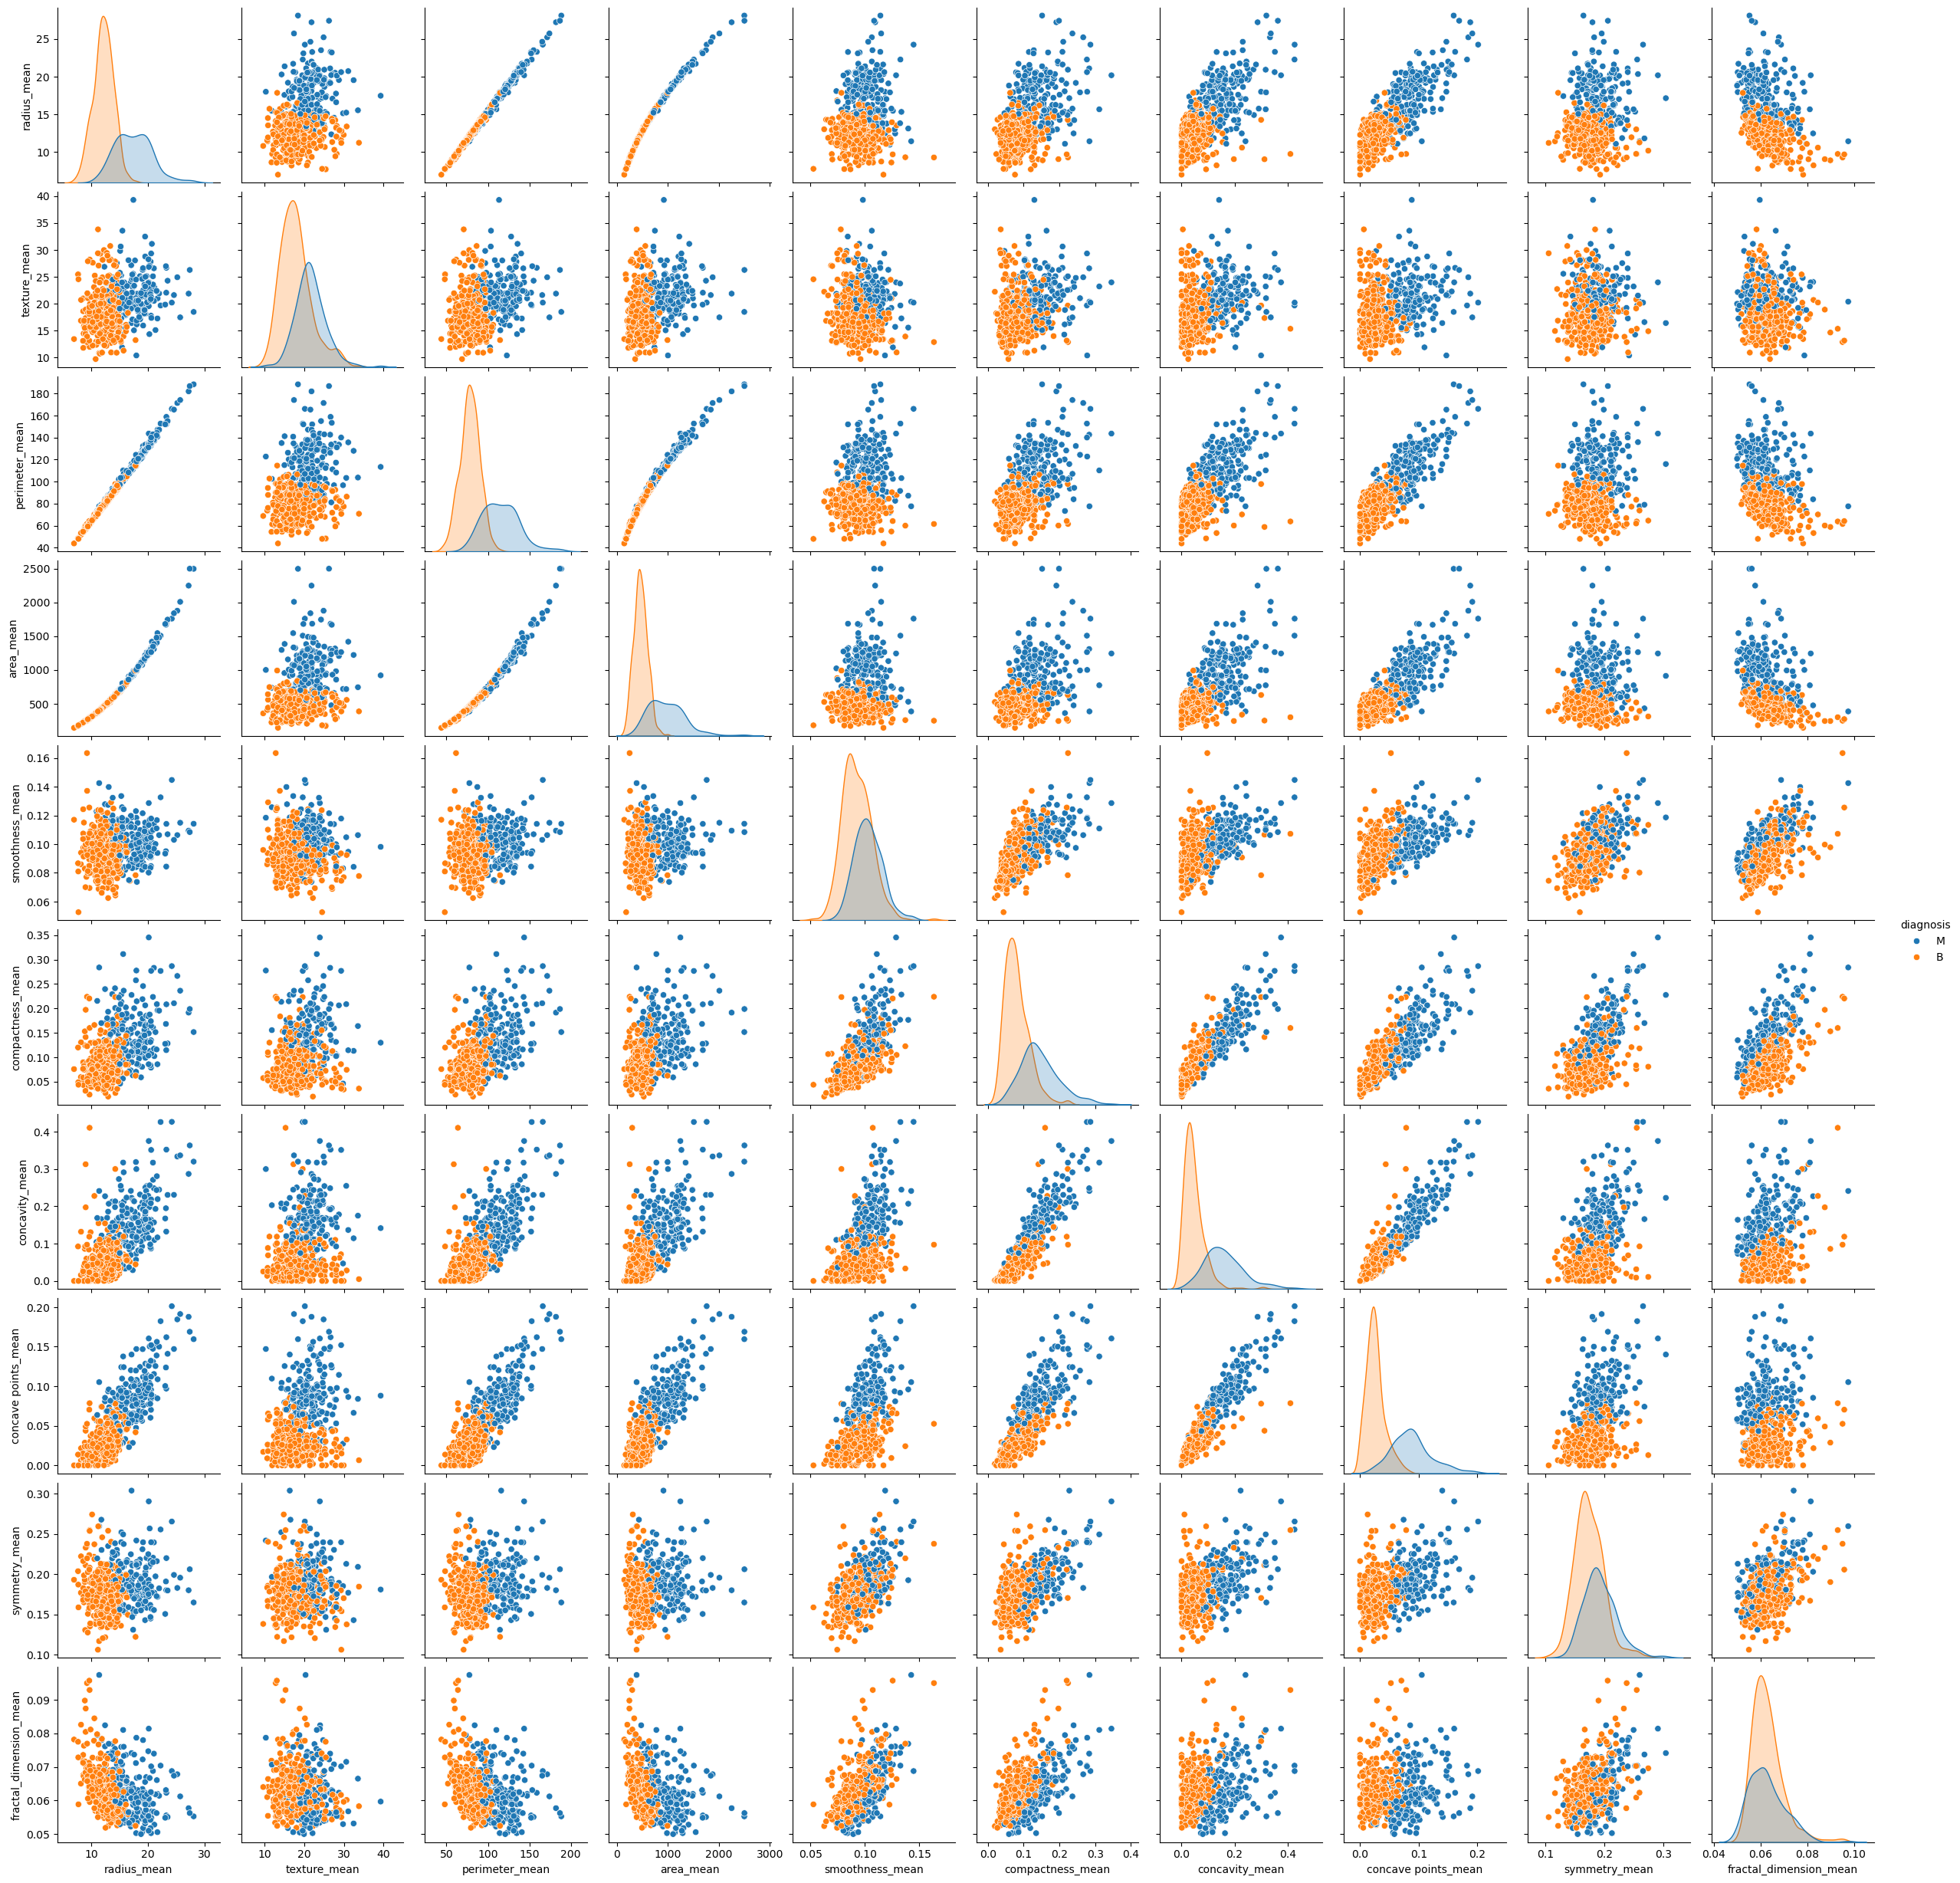

In [14]:
sb.pairplot(data,
            hue='diagnosis',
            vars=['radius_mean', 'texture_mean',
                  'perimeter_mean', 'area_mean',
                  'smoothness_mean', 'compactness_mean',
                  'concavity_mean', 'concave points_mean',
                  'symmetry_mean', 'fractal_dimension_mean'])

# Trennung in Daten und Labels

### Aufgabe:
- Wir wollen die Daten trennen in "Daten" und "Label". Das Label ist die Spalte "diagnosis". Daten sollen mit `X` und Labels mit `y` benannt werden.

In [19]:
# Labels ("y")
y = data.diagnosis                       # M or B 

# Daten ("X")
X = data.drop("diagnosis", axis = 1)

## Correlation analysis

Der Plot wird (wahrscheinlich) etwas besser lesbar, wenn wir die Werte mit anzeigen (`annot=True`), dazu `fmt=".1f"` zum Runden. 

Wir können auch eine andere "Colormap" auswählen, siehe [matplotlib-Dokumentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html).
Dazu passt auch das Setzen von Min- und Max-Werten, hier am besten mit `vmin=-1, vmax=1`.

<Axes: >

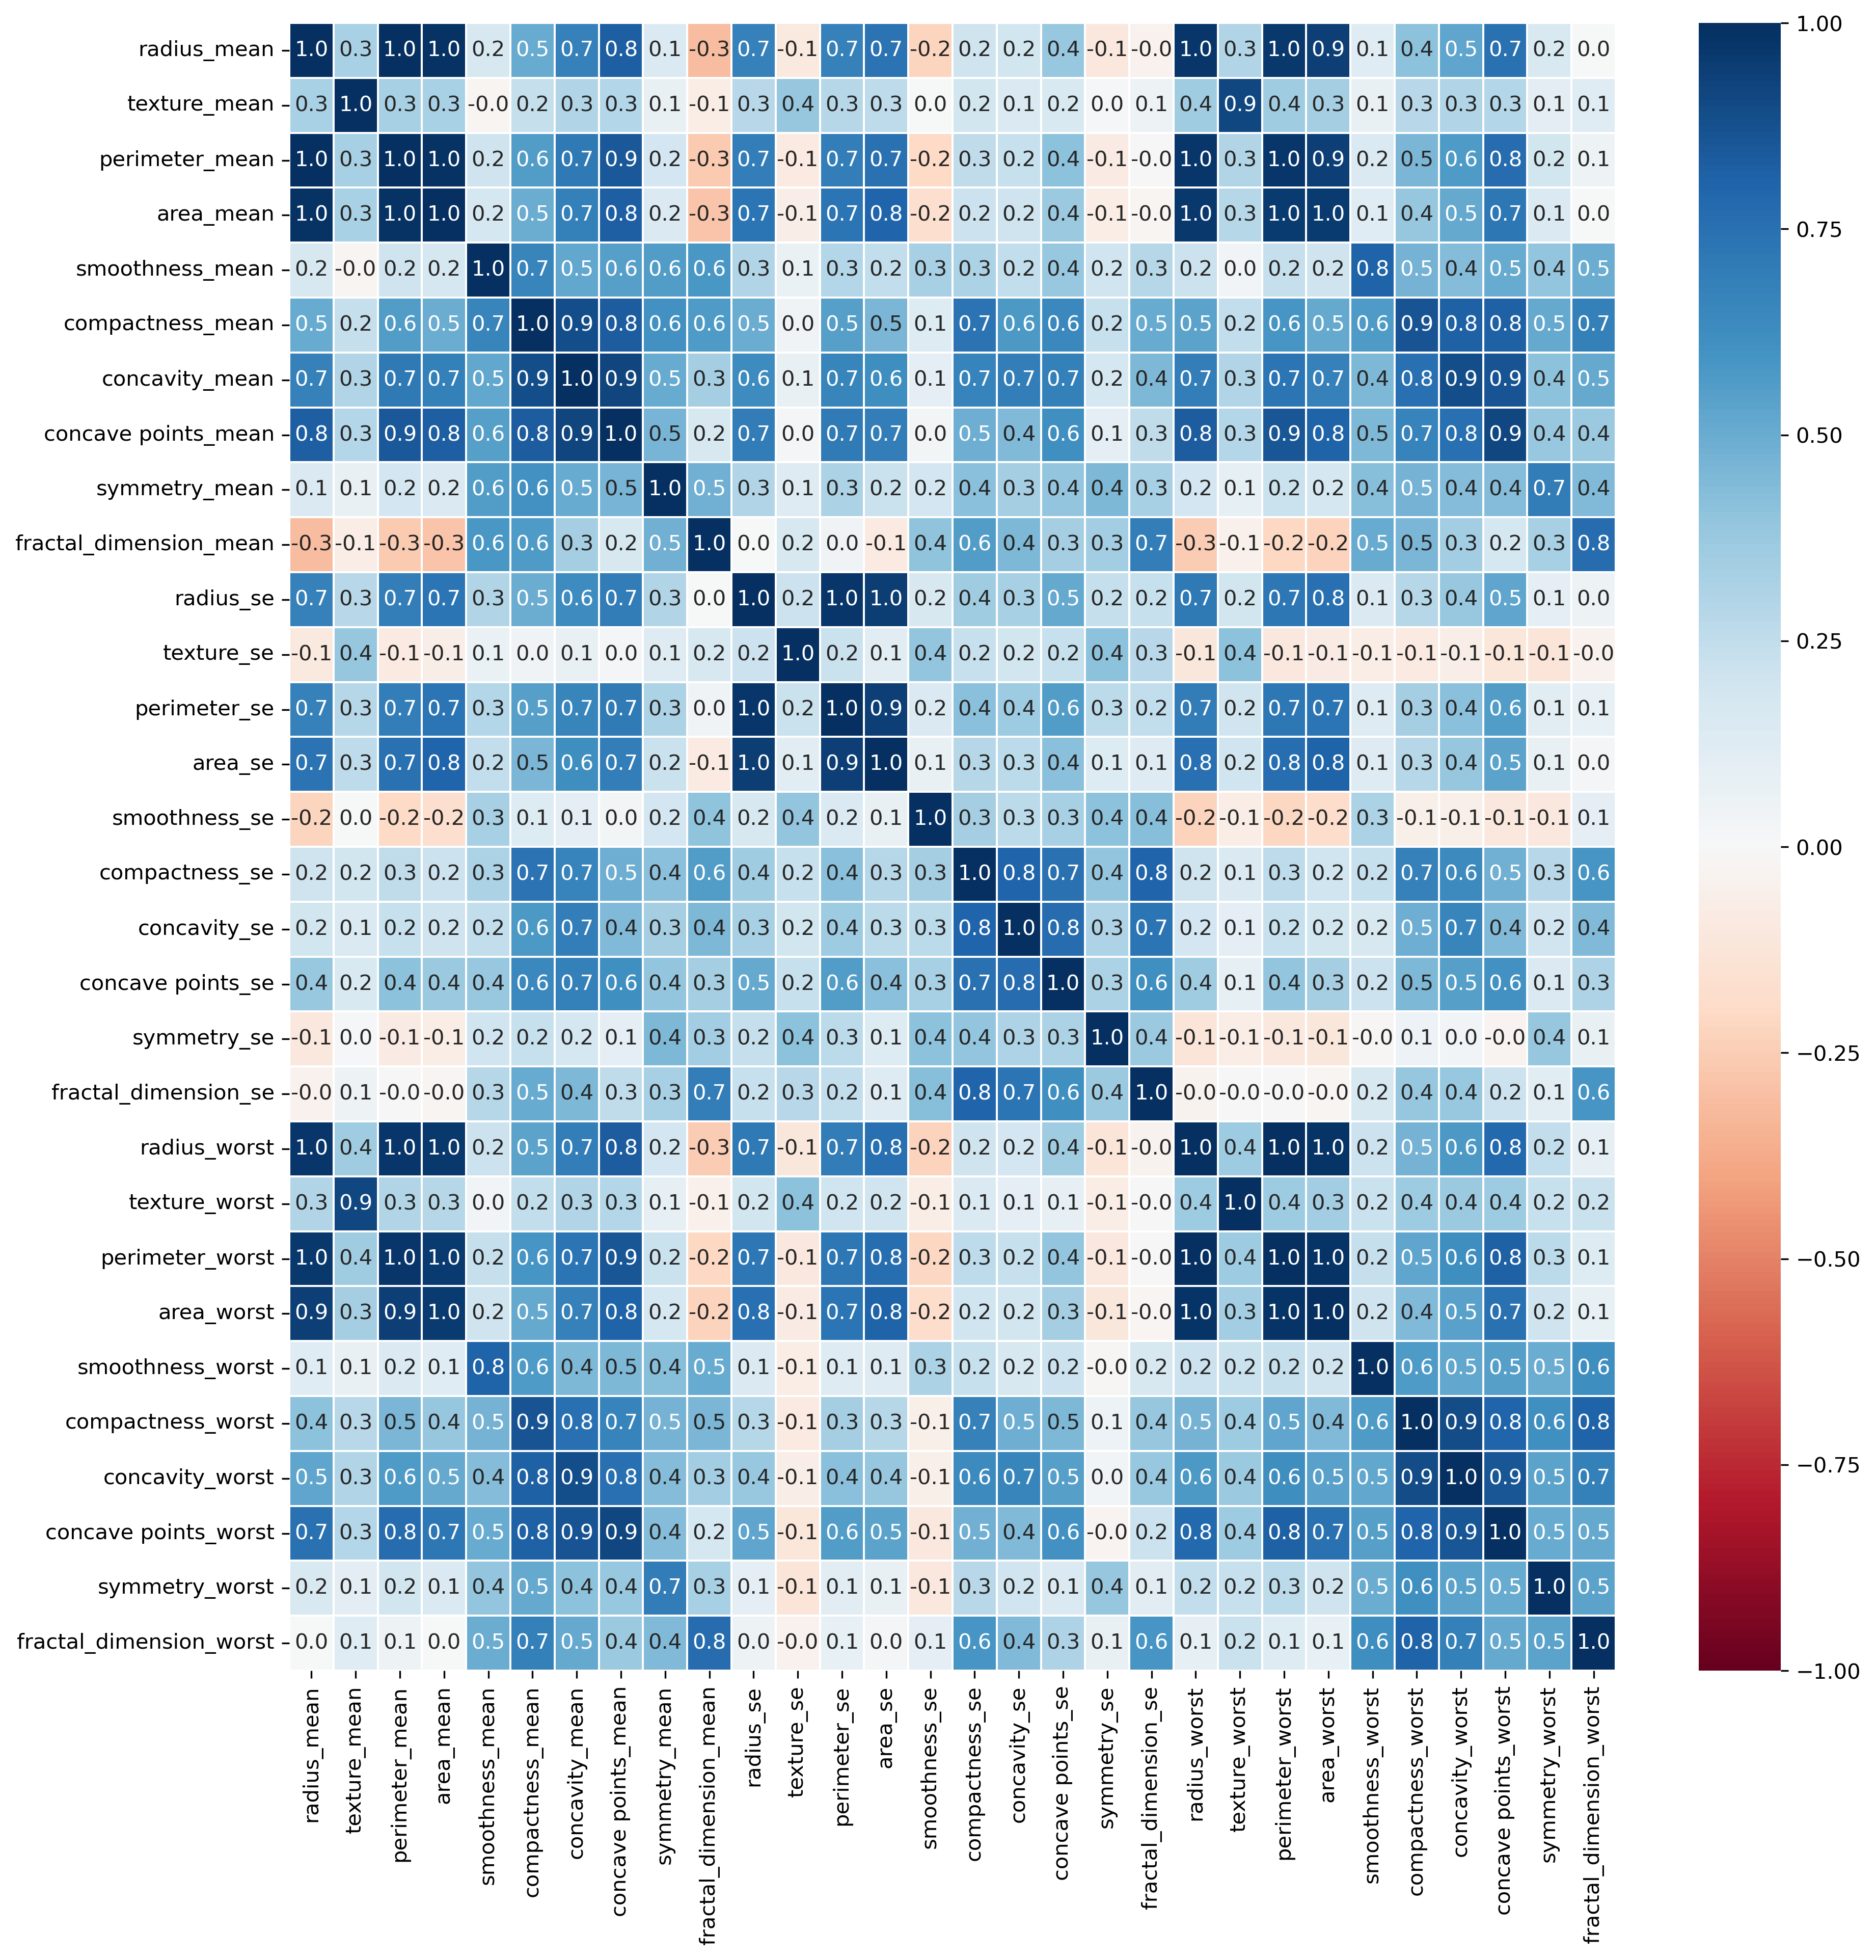

In [24]:
fig, ax = plt.subplots(figsize=(14, 14), dpi=300)
sb.heatmap(X.corr(),
           annot=True, fmt=".1f",
           linewidths=.5,
           cmap="RdBu",
           vmin=-1, vmax=1)

## High correlation filter

Da dies in der Vorlesung besprochen wurde, soll hier nur einmal kurz gezeigt werden wie **Feature Selection** über einen **high correlation filter** aussehen würde.

In [25]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

In [26]:
X_filtered = remove_collinear_features(X, 0.9)

Removed Columns {'radius_worst', 'perimeter_worst', 'concave points_mean', 'perimeter_mean', 'area_se', 'area_mean', 'area_worst', 'perimeter_se', 'texture_worst', 'concave points_worst'}


In [27]:
X_filtered.shape, X.shape

((569, 20), (569, 30))

# Dimensionality reduction 
## Linear methods: PCA
Wir nutzen die PCA Implementierung aus Scikit-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
 
Diese können wir z.B. importieren mit:
 ```python
from sklearn.decomposition import PCA
```

Anschließend erstellen wir ein "PCA-Objekt" in Python: 
```python
pca = PCA(n_components=...).fit(X)
```
Danach können damit Daten in entsprechende PCA-Komponenten umgerechnet werden mit: 
```python
X_pca = pca.transform(my_data_here)
```

### Aufgabe:
- Reduzieren der Daten ("X") auf 2 Dimensionen mittels PCA.
- Darstellen als 2D Scatter-Plot

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

# Darstellen der Komponenten als 2D-Plot

Mögliche Darstellungen können mit `matplotlib` oder `seaborn` erstellt werden.
Zum Beispiel:
```python
colors = ["crimson" if x == "M" else "teal" for x in y]

plt.scatter(..mein_x..., ..mein_y...,  c=colors, alpha=0.5)
```

Oder mit Seaborn:
```python
fig, ax = plt.subplots(figsize=(8, 8))

sb.scatterplot(x=..mein_x..., y=..mein_y...,
               hue=y, palette='Set1', ax=ax[0], alpha=0.5)
```


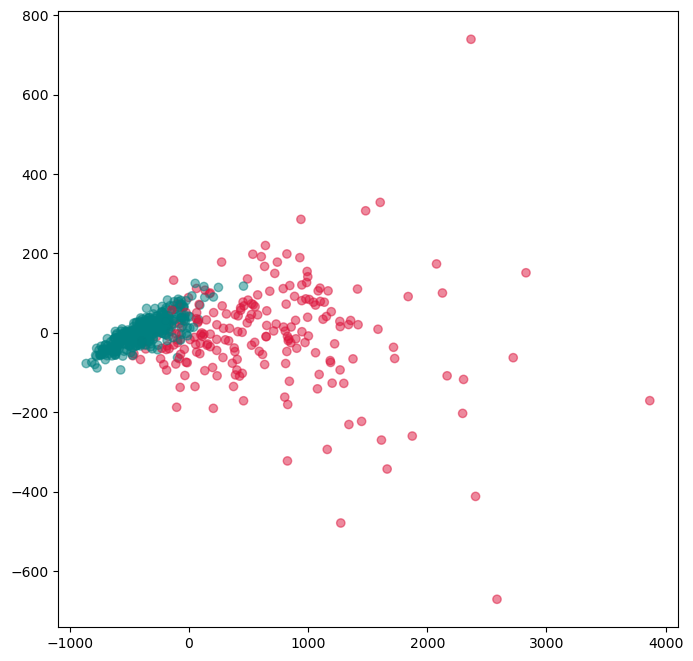

In [44]:
colors = ["crimson" if x == "M" else "teal" for x in y]
fig, ax = plt.subplots(figsize=(8, 8))

#sb.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
#                hue=y, palette='Set1', ax=ax[0], alpha=0.5)

plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, alpha=0.5)


In [42]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

## Kurze Frage:
- Wie schaut das aus? Zufrieden?
- Was gibt `pca.explained_variance_ratio_` aus und ist das gut oder schlecht?

## Scaling the features
Dazu nutzen wir den `StandardScaler` von Scikit-Learn. 
Was macht der genau?

### Aufgabe:
- Code ausführen und `X_scaled` anschauen
- Danach PCA noch einmal berechnen, aber diesmal mit `X_scaled`. Was verändert sich und wie sehen die Plot jetzt aus? Ändert sich `pca.explained_variance_ratio_` ?

In [45]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [50]:
pca = PCA(n_components=2).fit(X_scaled)
X_pca = pca.transform(X_scaled)

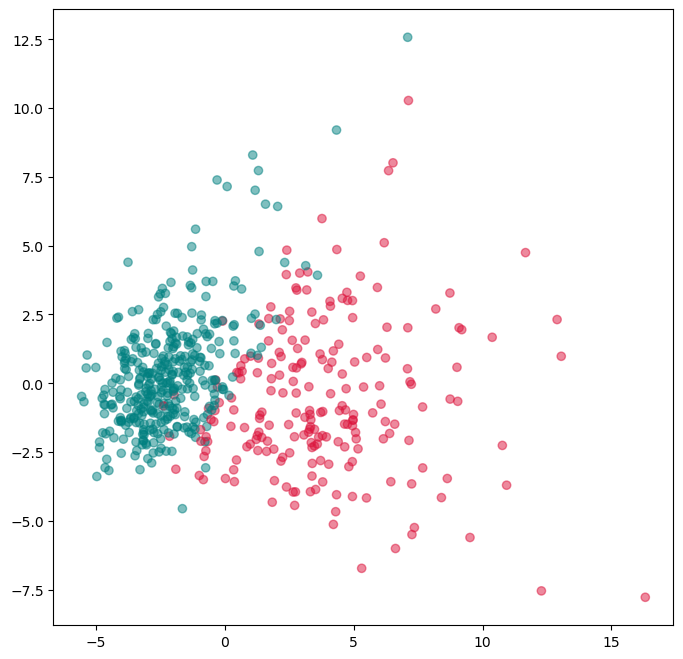

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, alpha=0.5)

In [49]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [59]:
pca = PCA(n_components=10).fit(X_scaled)
X_pca = pca.transform(X_scaled)
pca.explained_variance_ratio_.sum()

0.9515688142933499

## Kernel PCA

- Vorteil: nicht-linear
- Nachteil: zusätzliche Parameter ("gamma")

### Aufgaben
- Statt PCA diesmal Kernel-PCA nutzen. Als Gamme-Werte können verschiedene Werte ausprobiert werden.
- Wieder Plots erstellen und mit den PCA-Plots vergleichen


Siehe auch: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html?highlight=kernel%20pca#sklearn.decomposition.KernelPCA


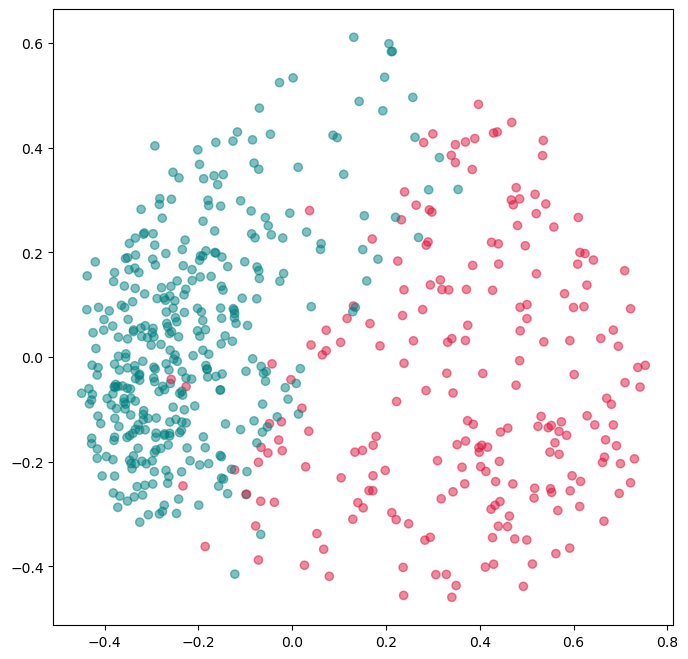

In [74]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', 
                 gamma=0.01, random_state=0).fit(X_scaled)

X_kpca = kpca.transform(X_scaled)

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=colors, alpha=0.5)



## t-SNE
T-SNE ist eine schon wesentlich komplexere Technik um die Dimensionen zu reduzieren. In der Benutzung gibt es aber kaum Unterschiede zu den anderen Techniken wie PCA. 

Der zentrale Parameter ist `perplexity`, typische Werte liegen zwischen 5 und 50.

### Aufgaben:
- Erneut die Dimensionen berechnen und darstellen (und mit PCA vergleichen).

Siehe auch: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#sklearn.manifold.TSNE


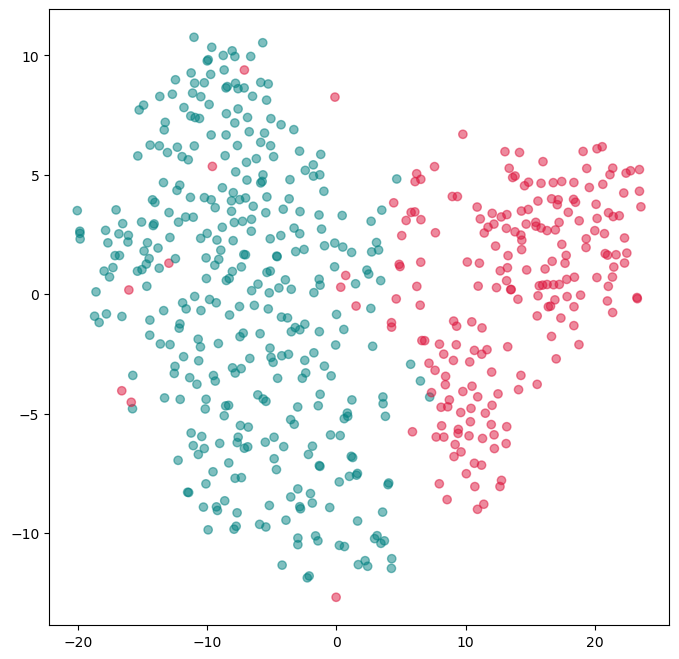

In [87]:
from sklearn.manifold import TSNE


X_tsne = TSNE(perplexity=50, random_state=0).fit_transform(X_scaled)
#X_tsne = tsne.transform(X_scaled)

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=colors, alpha=0.5)

## t-SNE on top of pca
Oft wird PCA mit T-SNE kombiniert.

### Aufgabe
- Erst mit PCA die Daten auf 10 Dimension reduzieren
- Dann mit T-SNE auf 2 Dimensionen reduzieren und darstellen!

--- 
# Bonus-Material

## MDS (Multidimensional Scaling)

A non-linear dimensionality reduction technique trying to preserve the distances between instances while reducing the dimensionality of non-linear data.
There are two types of MDS algorithms: Metric and Non-metric.

- disadvantage: slow!

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, metric=True, random_state=2)


## Isomap (Isometric mapping)

In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')


More tipps and techniques: https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b